# Dataset analisys

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Creating a full dataset

In [8]:
column_names = [
    "timestamp",
    "activity_id",  
    "heart_rate",
    "IMU_hand_temperature",
    "IMU_hand_3D_acceleration_data_16g_1",
    "IMU_hand_3D_acceleration_data_16g_2",
    "IMU_hand_3D_acceleration_data_16g_3",
    "IMU_hand_3D_acceleration_data_6g_1",
    "IMU_hand_3D_acceleration_data_6g_2",
    "IMU_hand_3D_acceleration_data_6g_3",
    "IMU_hand_3D_gyroscope_data_1",
    "IMU_hand_3D_gyroscope_data_2",
    "IMU_hand_3D_gyroscope_data_3",
    "IMU_hand_3D_magnetometer_data_1",
    "IMU_hand_3D_magnetometer_data_2",
    "IMU_hand_3D_magnetometer_data_3",
    "IMU_hand_orientation_1",
    "IMU_hand_orientation_2",
    "IMU_hand_orientation_3",
    "IMU_hand_orientation_4",
    "IMU_chest_temperature",
    "IMU_chest_3D_acceleration_data_16g_1",
    "IMU_chest_3D_acceleration_data_16g_2",
    "IMU_chest_3D_acceleration_data_16g_3",
    "IMU_chest_3D_acceleration_data_6g_1",
    "IMU_chest_3D_acceleration_data_6g_2",
    "IMU_chest_3D_acceleration_data_6g_3",
    "IMU_chest_3D_gyroscope_data_1",
    "IMU_chest_3D_gyroscope_data_2",
    "IMU_chest_3D_gyroscope_data_3",
    "IMU_chest_3D_magnetometer_data_1",
    "IMU_chest_3D_magnetometer_data_2",
    "IMU_chest_3D_magnetometer_data_3",
    "IMU_chest_orientation_1",
    "IMU_chest_orientation_2",
    "IMU_chest_orientation_3",
    "IMU_chest_orientation_4",
    "IMU_ankle_temperature",
    "IMU_ankle_3D_acceleration_data_16g_1",
    "IMU_ankle_3D_acceleration_data_16g_2",
    "IMU_ankle_3D_acceleration_data_16g_3",
    "IMU_ankle_3D_acceleration_data_6g_1",
    "IMU_ankle_3D_acceleration_data_6g_2",
    "IMU_ankle_3D_acceleration_data_6g_3",
    "IMU_ankle_3D_gyroscope_data_1",
    "IMU_ankle_3D_gyroscope_data_2",
    "IMU_ankle_3D_gyroscope_data_3",
    "IMU_ankle_3D_magnetometer_data_1",
    "IMU_ankle_3D_magnetometer_data_2",
    "IMU_ankle_3D_magnetometer_data_3",
    "IMU_ankle_orientation_1",
    "IMU_ankle_orientation_2",
    "IMU_ankle_orientation_3",
    "IMU_ankle_orientation_4",
]

# for_gen = [    "IMU_hand_3D_acceleration_data_16g",
#     "IMU_hand_3D_acceleration_data_16g",
#     "IMU_hand_3D_acceleration_data_16g",
#     "IMU_hand_3D_acceleration_data_6g",
#     "IMU_hand_3D_acceleration_data_6g",
#     "IMU_hand_3D_acceleration_data_6g",
#     "IMU_hand_3D_gyroscope_data",
#     "IMU_hand_3D_gyroscope_data",
#     "IMU_hand_3D_gyroscope_data",
#     "IMU_hand_3D_magnetometer_data",
#     "IMU_hand_3D_magnetometer_data",
#     "IMU_hand_3D_magnetometer_data",
#     "IMU_hand_orientation",
#     "IMU_hand_orientation",
#     "IMU_hand_orientation",]

# for el in for_gen:
#     print(f"\"{el.replace('hand', 'ankle')}\",")
len(column_names)

54

In [9]:
person1 = pd.read_csv("Protocol\\subject101.dat", delimiter=" ", names=column_names, header=None)
person2 = pd.read_csv("Protocol\\subject102.dat", delimiter=" ", names=column_names, header=None)
person3 = pd.read_csv("Protocol\\subject103.dat", delimiter=" ", names=column_names, header=None)
person4 = pd.read_csv("Protocol\\subject104.dat", delimiter=" ", names=column_names, header=None)
person5 = pd.read_csv("Protocol\\subject105.dat", delimiter=" ", names=column_names, header=None)
person6 = pd.read_csv("Protocol\\subject106.dat", delimiter=" ", names=column_names, header=None)
person7 = pd.read_csv("Protocol\\subject107.dat", delimiter=" ", names=column_names, header=None)
person8 = pd.read_csv("Protocol\\subject108.dat", delimiter=" ", names=column_names, header=None)
person9 = pd.read_csv("Protocol\\subject109.dat", delimiter=" ", names=column_names, header=None)

person1_additional = pd.read_csv("Optional\\subject101.dat", delimiter=" ", names=column_names, header=None)
person5_additional = pd.read_csv("Optional\\subject105.dat", delimiter=" ", names=column_names, header=None)
person6_additional = pd.read_csv("Optional\\subject106.dat", delimiter=" ", names=column_names, header=None)
person8_additional = pd.read_csv("Optional\\subject108.dat", delimiter=" ", names=column_names, header=None)
person9_additional = pd.read_csv("Optional\\subject109.dat", delimiter=" ", names=column_names, header=None)



In [10]:
df_list = [person1, person2, person3, person4, person5, person6, person7, person8, person9, person1_additional, person5_additional, person6_additional, person8_additional, person9_additional]

In [11]:
sum(len(df) for df in df_list)

3850505

In [ ]:
len([col for col in person1.columns if person1[col].isna().any()])

In [ ]:
for el in person1.columns:
    if el not in [col for col in person1.columns if person1[col].isna().any()]:
        print(el)

In [ ]:
for col in person1.columns:
    print(col, person1[col].isna().sum())

In [ ]:
col_for_drop = [col for col in person1.columns if col.endswith(tuple(f"orientation_{i}" for i in range(1, 5)))]
col_for_drop += [col for col in person1.columns if col.endswith(tuple(f"acceleration_data_6g_{i}" for i in range(1, 4)))]
col_for_drop += ["timestamp"]
person1.drop(columns=col_for_drop)
len(col_for_drop)

22

hr_1, hr_2 = 104, 104
first, second = 0, 10

for df in [person1, person2, person3, person4, person5, person6, person7, person8, person9]:
    for i in range(11, len(df)):
        if not pd.isna(df["heart_rate"][i]):
            # print("number is found", person1["heart_rate"][i], first, second, hr_1, hr_2)
            df.loc[first + 1:second, "heart_rate"] = df.loc[first + 1:second, "heart_rate"].fillna((hr_1 + hr_2) / 2)
            first, second = second, i
            hr_1, hr_2 = hr_2, df["heart_rate"][i]
    
# df.head(50)

In [ ]:
for df in df_list:
    # получаем позиции (integer index) всех ненулевых значений
    hr_positions = np.flatnonzero(df['heart_rate'].notna())
    # если мало точек — ничего не заполняем
    if len(hr_positions) < 2:
        continue

    # инициализируем первые две точки
    first_idx, second_idx = hr_positions[0], hr_positions[1]
    hr_1 = df['heart_rate'].iat[first_idx]
    hr_2 = df['heart_rate'].iat[second_idx]

    # для каждой следующей известной точки
    for pos in hr_positions[2:]:
        # заполняем промежуток [first_idx+1 : second_idx] средним
        fill_val = (hr_1 + hr_2) / 2
        df.loc[first_idx + 1 : second_idx, 'heart_rate'] = (
            df.loc[first_idx + 1 : second_idx, 'heart_rate']
              .fillna(fill_val)
        )
        # сдвигаем «окно»
        first_idx, second_idx = second_idx, pos
        hr_1, hr_2 = hr_2, df['heart_rate'].iat[pos]

    # заполняем все NaN после последней известной точки
    df.loc[second_idx + 1 :, 'heart_rate'] = (
        df.loc[second_idx + 1 :, 'heart_rate']
          .fillna(hr_2)
    )

In [ ]:
person1["heart_rate"].value_counts()

In [ ]:
person1["heart_rate"].tail(20)

In [ ]:
df = person1.drop(columns=col_for_drop)
df.dropna(inplace=True)
df = df[df["activity_id"] != 0]

len(df)

In [ ]:
X = df.drop(columns=["activity_id"])
y = df["activity_id"]

In [ ]:
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [ ]:
all_classes = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
len(all_classes)

18

## Encoding

In [ ]:
df_list = [person1, person2, person3, person4, person5, person6, person7, person8, person9, person1_additional, person5_additional, person6_additional, person8_additional, person9_additional]

In [ ]:
df_protocole = pd.concat([person1, person2, person3, person4, person5, person6, person7, person8, person9], axis=0, ignore_index=True)

In [ ]:
df_protocole = df_protocole.drop(columns=col_for_drop)
df_protocole = df_protocole.dropna()
df_protocole = df_protocole[df_protocole["activity_id"] != 0]

In [ ]:
df_1 = df_protocole[df_protocole["activity_id"] == 1]
df_2 = df_protocole[df_protocole["activity_id"] == 2]
df_3 = df_protocole[df_protocole["activity_id"] == 3]
df_4 = df_protocole[df_protocole["activity_id"] == 4]
df_5 = df_protocole[df_protocole["activity_id"] == 5]
df_6 = df_protocole[df_protocole["activity_id"] == 6]
df_7 = df_protocole[df_protocole["activity_id"] == 7]
df_9 = df_protocole[df_protocole["activity_id"] == 9]
df_10 = df_protocole[df_protocole["activity_id"] == 10]
df_11 = df_protocole[df_protocole["activity_id"] == 11]
df_12 = df_protocole[df_protocole["activity_id"] == 12]
df_13 = df_protocole[df_protocole["activity_id"] == 13]
df_16 = df_protocole[df_protocole["activity_id"] == 16]
df_17 = df_protocole[df_protocole["activity_id"] == 17]
df_18 = df_protocole[df_protocole["activity_id"] == 18]
df_19 = df_protocole[df_protocole["activity_id"] == 19]
df_20 = df_protocole[df_protocole["activity_id"] == 20]
df_24 = df_protocole[df_protocole["activity_id"] == 24]

In [ ]:
df_1 = df_all[df_all["activity_id"] == 1]
df_2 = df_all[df_all["activity_id"] == 2]
df_3 = df_all[df_all["activity_id"] == 3]
df_4 = df_all[df_all["activity_id"] == 4]
df_5 = df_all[df_all["activity_id"] == 5]
df_6 = df_all[df_all["activity_id"] == 6]
df_7 = df_all[df_all["activity_id"] == 7]
df_9 = df_all[df_all["activity_id"] == 9]
df_10 = df_all[df_all["activity_id"] == 10]
df_11 = df_all[df_all["activity_id"] == 11]
df_12 = df_all[df_all["activity_id"] == 12]
df_13 = df_all[df_all["activity_id"] == 13]
df_16 = df_all[df_all["activity_id"] == 16]
df_17 = df_all[df_all["activity_id"] == 17]
df_18 = df_all[df_all["activity_id"] == 18]
df_19 = df_all[df_all["activity_id"] == 19]
df_20 = df_all[df_all["activity_id"] == 20]
df_24 = df_all[df_all["activity_id"] == 24]

NameError: name 'df_all' is not defined

In [ ]:
df_grouped_by_id = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_9, df_10, df_11, df_12, df_13, df_16, df_17, df_18, df_19, df_20, df_24]

In [ ]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()

for df in df_grouped_by_id:
    split_idx_train = int(len(df) * 0.1)
    split_idx_test = int(len(df) * 0.02)

    train_df = pd.concat([train_df, df.iloc[:split_idx_train]])
    test_df = pd.concat([test_df, df.iloc[split_idx_train : split_idx_train + split_idx_test]])


In [ ]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()

for df in df_grouped_by_id:
    split_idx = int(len(df) * 0.8)
    # split_idx_test = int(len(df) * 0.02)

    train_df = pd.concat([train_df, df.iloc[:split_idx]])
    test_df = pd.concat([test_df, df.iloc[split_idx:]])


In [ ]:
print(len(train_df), len(test_df), len(train_df) + len(test_df), sum([len(df) for df in df_grouped_by_id]), len(df_protocole))

1537117 384284 1921401 1921401 1921401


In [ ]:
X_train, X_test = train_df.drop(columns=["activity_id"]), test_df.drop(columns=["activity_id"])
y_train, y_test = train_df["activity_id"], test_df["activity_id"]

In [ ]:
df_all = pd.concat(df_list, axis=0, ignore_index=True)

In [ ]:
df_all = df_all.drop(columns=col_for_drop)
df_all = df_all.dropna()
df_all = df_all[df_all["activity_id"] != 0]

In [ ]:
df_1 = df_all[df_all["activity_id"] == 1]
df_2 = df_all[df_all["activity_id"] == 2]
df_3 = df_all[df_all["activity_id"] == 3]
df_4 = df_all[df_all["activity_id"] == 4]
df_5 = df_all[df_all["activity_id"] == 5]
df_6 = df_all[df_all["activity_id"] == 6]
df_7 = df_all[df_all["activity_id"] == 7]
df_9 = df_all[df_all["activity_id"] == 9]
df_10 = df_all[df_all["activity_id"] == 10]
df_11 = df_all[df_all["activity_id"] == 11]
df_12 = df_all[df_all["activity_id"] == 12]
df_13 = df_all[df_all["activity_id"] == 13]
df_16 = df_all[df_all["activity_id"] == 16]
df_17 = df_all[df_all["activity_id"] == 17]
df_18 = df_all[df_all["activity_id"] == 18]
df_19 = df_all[df_all["activity_id"] == 19]
df_20 = df_all[df_all["activity_id"] == 20]
df_24 = df_all[df_all["activity_id"] == 24]

In [ ]:
df_grouped_by_id = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_9, df_10, df_11, df_12, df_13, df_16, df_17, df_18, df_19, df_20, df_24]

In [ ]:
df_1.describe()

,activity_id,heart_rate,IMU_hand_temperature,IMU_hand_3D_acceleration_data_16g_1,IMU_hand_3D_acceleration_data_16g_2,IMU_hand_3D_acceleration_data_16g_3,IMU_hand_3D_gyroscope_data_1,IMU_hand_3D_gyroscope_data_2,IMU_hand_3D_gyroscope_data_3,IMU_hand_3D_magnetometer_data_1,...,IMU_ankle_temperature,IMU_ankle_3D_acceleration_data_16g_1,IMU_ankle_3D_acceleration_data_16g_2,IMU_ankle_3D_acceleration_data_16g_3,IMU_ankle_3D_gyroscope_data_1,IMU_ankle_3D_gyroscope_data_2,IMU_ankle_3D_gyroscope_data_3,IMU_ankle_3D_magnetometer_data_1,IMU_ankle_3D_magnetometer_data_2,IMU_ankle_3D_magnetometer_data_3
count,192290.0,192290.000000,192290.000000,192290.000000,192290.000000,192290.000000,192290.000000,192290.000000,192290.000000,192290.000000,...,192290.000000,192290.000000,192290.000000,192290.000000,192290.000000,192290.000000,192290.000000,192290.000000,192290.000000,192290.000000
mean,1.0,75.530633,32.725084,3.673203,2.065688,6.364550,-0.003575,0.004342,-0.000743,-0.346402,...,32.974927,0.546173,-6.333580,-3.695293,0.010507,-0.006022,0.005689,-17.924955,20.569583,0.137444
std,0.0,10.537518,1.405441,4.065339,3.338930,2.997271,0.362812,0.244257,0.265617,20.577099,...,1.424708,2.615177,5.598364,3.029363,0.217365,0.119334,0.180730,9.557956,18.538709,18.154522
min,1.0,57.000000,30.187500,-20.707100,-19.506400,-15.184400,-11.883700,-5.349000,-7.743460,-50.208500,...,30.000000,-9.749830,-73.798100,-28.387600,-7.211810,-2.326790,-3.823560,-126.418000,-82.569900,-61.163400
25%,1.0,70.000000,31.312500,0.716307,-0.257638,6.069410,-0.022652,-0.013640,-0.019057,-9.124430,...,31.687500,-0.882298,-9.504880,-5.258330,-0.011273,-0.022176,-0.007879,-18.866200,16.235100,-7.887025
50%,1.0,74.000000,32.875000,5.045330,2.180250,6.688810,-0.003478,0.003784,-0.005933,-0.927929,...,33.500000,-0.381279,-9.116950,-3.898550,0.009231,-0.005558,0.004205,-15.067300,23.802400,-5.630530
75%,1.0,81.000000,33.812500,6.765480,4.563340,8.201245,0.015821,0.021181,0.007592,14.319500,...,34.125000,0.622447,-7.271610,-2.000438,0.028878,0.011490,0.016210,-13.660025,28.461000,-3.782970
max,1.0,115.000000,34.937500,21.033200,44.433400,42.538800,6.986050,5.254870,4.632390,66.215400,...,34.687500,37.452300,58.752500,53.549000,10.686700,2.148590,5.235670,14.705000,79.160400,93.101900


In [ ]:
for i in range(len(df_grouped_by_id)):
    df = df_grouped_by_id[i].copy()  # делаем явную копию

    df["sum_temperature"] = (
        df["IMU_hand_temperature"] +
        df["IMU_chest_temperature"] +
        df["IMU_ankle_temperature"]
    )

    df["sum_hand_acceleration"] = (
        df["IMU_hand_3D_acceleration_data_16g_1"] +
        df["IMU_hand_3D_acceleration_data_16g_2"] +
        df["IMU_hand_3D_acceleration_data_16g_3"]
    )

    df["sum_chest_acceleration"] = (
        df["IMU_chest_3D_acceleration_data_16g_1"] +
        df["IMU_chest_3D_acceleration_data_16g_2"] +
        df["IMU_chest_3D_acceleration_data_16g_3"]
    )

    df["sum_ankle_acceleration"] = (
        df["IMU_ankle_3D_acceleration_data_16g_1"] +
        df["IMU_ankle_3D_acceleration_data_16g_2"] +
        df["IMU_ankle_3D_acceleration_data_16g_3"]
    )

    df["heart_rate_roling_meat"] = df["heart_rate"].rolling(window=5, min_periods=1).mean()

    df_grouped_by_id[i] = df  # сохраняем обратно


In [ ]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()

for df in df_grouped_by_id:
    split_idx = int(len(df) * 0.8)
    # split_idx_test = int(len(df) * 0.02)

    train_df = pd.concat([train_df, df.iloc[:split_idx]])
    test_df = pd.concat([test_df, df.iloc[split_idx:]])


In [ ]:
X_train, X_test = train_df.drop(columns=["activity_id"]), test_df.drop(columns=["activity_id"])
y_train, y_test = train_df["activity_id"], test_df["activity_id"]

In [ ]:
uniq_value = df_all["activity_id"].unique()
print(sorted(uniq_value))

In [ ]:
type_of_activities = set()
for df in df_list:
    for el in df["activity_id"].unique():
        type_of_activities.add(el)

len(type_of_activities)

In [ ]:
len(df_all)

In [ ]:
df_all["activity_id"].value_counts()

In [ ]:
df_all.dropna(inplace=True)
df_all = df_all[df_all["activity_id"] != 0]

In [ ]:
len(df_all)

In [ ]:
df_protocole = df_protocole.dropna()

In [ ]:
X = df_protocole.drop(columns=["activity_id"])
y = df_protocole["activity_id"]

In [ ]:
X = df_all.drop(columns=["activity_id"])
y = df_all["activity_id"]

In [ ]:
# Удаляем строки с activity_id == 0 в исходном DataFrame
df_filtered = df_all[df_all["activity_id"] != 0]

# Пересоздаем X и y после фильтрации
X = df_filtered.drop(columns=["activity_id"])
y = df_filtered["activity_id"]

In [ ]:
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

NameError: name 'X' is not defined

In [ ]:
def stratified_time_series_split(X, y, activity_col='activity_id', test_size=0.2):
    """
    Splits time-series data into train/test sets while:
    - Preserving temporal order within each `activity_id`.
    - Ensuring all activity types appear in both splits.
    """
    X_train, X_test = pd.DataFrame(), pd.DataFrame()
    y_train, y_test = pd.Series(dtype=y.dtype), pd.Series(dtype=y.dtype)

    # Split each activity group sequentially
    for activity in X[activity_col].unique():  # Read activity_id from X, not y!
        # Filter data for this activity
        mask = (X[activity_col] == activity)
        X_activity = X[mask]
        y_activity = y[mask]

        # Split chronologically (no shuffling)
        split_idx = int(len(X_activity) * (1 - test_size))
        if split_idx == 0:  # Handle tiny groups (at least 1 sample in train)
            split_idx = 1
        if split_idx >= len(X_activity):  # Avoid empty test set
            split_idx = len(X_activity) - 1

        # Append splits
        X_train = pd.concat([X_train, X_activity.iloc[:split_idx]])
        X_test = pd.concat([X_test, X_activity.iloc[split_idx:]])
        y_train = pd.concat([y_train, y_activity.iloc[:split_idx]])
        y_test = pd.concat([y_test, y_activity.iloc[split_idx:]])

    return X_train, X_test, y_train, y_test
# Usage
X_train, X_test, y_train, y_test = stratified_time_series_split(X, y, activity_col='activity_id')

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# 1) Get unique classes from training data
train_classes = np.unique(y_train)

# 2) Initialize LabelEncoder only on train_classes
le = LabelEncoder().fit(train_classes)

# 3) Encode y_train
y_train_enc = le.transform(y_train)

# 4) Filter test set to only include classes present in training
test_mask = np.isin(y_test, train_classes)
X_test_filt = X_test[test_mask]
y_test_filt = y_test[test_mask]

# 5) Create preprocessing pipeline with RobustScaler
# (Assuming all columns need scaling - adjust if you have categorical features)
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', RobustScaler(), list(range(X_train.shape[1])))  # Scale all features
    ],
    remainder='passthrough'
)

# 6) Create full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        n_estimators=500,
        learning_rate=0.2,
        max_depth=20,
        gamma=0.1,
        colsample_bytree=0.8,
        random_state=42
    ))
])

# 7) Train the pipeline
pipeline.fit(X_train, y_train_enc)

# 8) Predictions (automatically applies scaling)
# Note: We predict on both filtered and unfiltered test sets for comparison
y_pred_enc = pipeline.predict(X_test)  # On full test set (may contain unseen classes)
y_pred_enc_filt = pipeline.predict(X_test_filt)  # On filtered test set

# 9) Convert back to original labels
y_pred = le.inverse_transform(y_pred_enc)
y_pred_filt = le.inverse_transform(y_pred_enc_filt)

# 10) Evaluation
print("Full Test Set Report (may contain unseen classes):")
print(classification_report(y_test, y_pred))

print("\nFiltered Test Set Report (only classes seen in training):")
print(classification_report(y_test_filt, y_pred_filt))

Full Test Set Report (may contain unseen classes):
              precision    recall  f1-score   support

           1       0.99      0.97      0.98     38458
           2       0.96      0.91      0.93     36929
           3       0.82      0.59      0.69     37797
           4       0.70      0.91      0.79     45942
           5       0.96      0.12      0.22     19127
           6       0.65      0.67      0.66     32661
           7       0.69      0.22      0.34     36889
           9       1.00      0.94      0.97     16725
          10       0.98      0.59      0.74     61921
          11       1.00      0.92      0.96     10890
          12       0.42      0.69      0.52     23419
          13       0.66      0.58      0.62     20973
          16       0.25      0.48      0.33     34996
          17       0.31      0.35      0.33     47581
          18       0.87      0.94      0.90     19891
          19       0.77      0.09      0.15     37324
          20       0.16      1

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# 1) Filter labels present in y_train
train_classes = np.unique(y_train)

# 2) LabelEncoder fit only on train_classes
le = LabelEncoder().fit(train_classes)

# 3) Encode y_train
y_train_enc = le.transform(y_train)

# 4) Filter test set (only labels seen in training)
mask = np.isin(y_test, train_classes)
X_test_filt = X_test[mask]
y_test_filt = y_test[mask]
y_test_enc = le.transform(y_test_filt)

# 5) Define XGBClassifier (without fixed params)
model = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42
)

# 6) Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],           # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    # 'max_depth': [3, 6, 9],                    # Tree depth
    # 'subsample': [0.8, 1.0],                   # % of samples per tree
    # 'colsample_bytree': [0.8, 1.0],            # % of features per tree
    # 'gamma': [0, 0.1],                         # Min loss reduction for split
}

# 7) GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',         # Or 'f1_macro' for multiclass
    cv=3,                      # 3-fold cross-validation
    n_jobs=-1,                 # Use all CPU cores
    verbose=2                  # Print progress
)

# 8) Fit GridSearch on training data
grid_search.fit(X_train, y_train_enc)

# 9) Best model and params
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# 10) Predictions (using best model)
y_pred_enc = best_model.predict(X_test_filt)
y_pred = le.inverse_transform(y_pred_enc)

# 11) Evaluation
print(classification_report(y_test_filt, y_pred))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Hyperparameters: {'learning_rate': 0.2, 'n_estimators': 500}
              precision    recall  f1-score   support

           1       0.99      0.86      0.92     38458
           2       0.71      0.91      0.80     36929
           3       0.65      0.30      0.41     37797
           4       0.69      1.00      0.81     45942
           5       1.00      0.10      0.18     19127
           6       0.51      0.58      0.54     32661
           7       0.85      0.22      0.35     36889
           9       1.00      0.92      0.96     16725
          10       1.00      0.60      0.75     61921
          11       1.00      0.92      0.96     10890
          12       0.50      0.51      0.51     23419
          13       0.71      0.68      0.69     20973
          16       0.25      0.30      0.27     34996
          17       0.26      0.31      0.28     47581
          18       0.39      0.97      0.56     19891
        

In [ ]:
# 1. Удаление строк с activity_id == 0 ДО разделения
df_filtered = df_all[df_all["activity_id"] != 0]

# 2. Разделение на фичи и целевую переменную
X = df_filtered.drop(columns=["activity_id"])
y = df_filtered["activity_id"]

# 3. Разделение на train/test
split_idx = int(len(df_filtered) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# 4. Проверка размеров данных
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

# Если X_test пустой (например, split_idx == len(df_filtered)), добавьте:
if X_test.shape[0] == 0:
    raise ValueError("Тестовый набор пуст. Увеличьте размер данных или уменьшите процент разделения")

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.96      0.98     38458
           2       0.98      0.92      0.95     36929
           3       0.86      0.90      0.88     37797
           4       0.69      0.98      0.81     45942
           5       0.66      0.01      0.01     19127
           6       0.96      0.86      0.91     32661
           7       0.63      0.22      0.33     36889
           9       1.00      0.94      0.97     16725
          10       1.00      0.52      0.69     61921
          11       1.00      0.91      0.95     10890
          12       0.63      0.60      0.62     23419
          13       0.71      0.13      0.21     20973
          16       0.52      0.74      0.61     34996
          17       0.23      0.37      0.28     47581
          18       0.29      0.53      0.37     19891
          19       0.28      0.07      0.11     37324
          20       0.15      1.00      0.26      9167
    

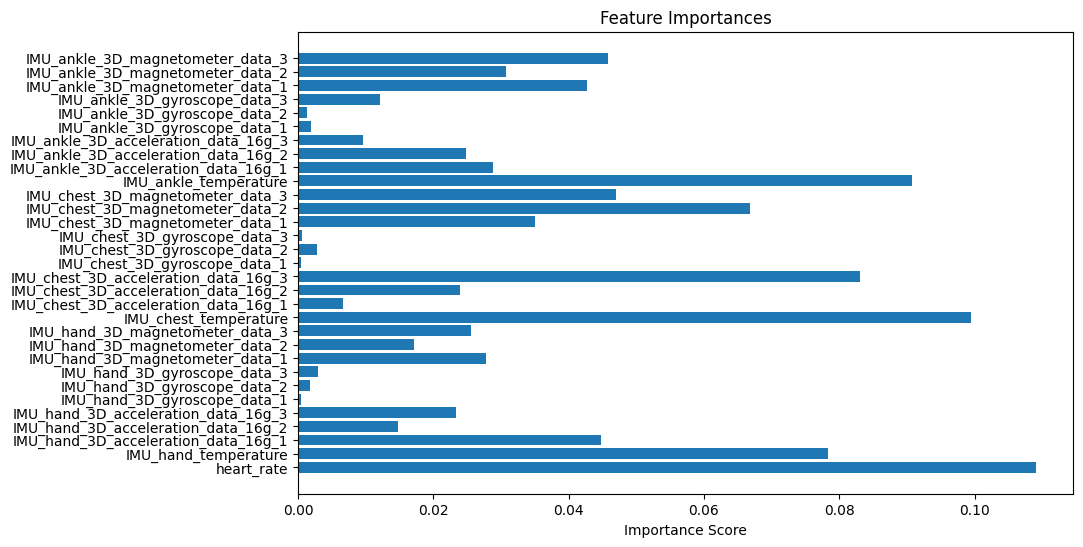

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Ваше разделение данных
# split_idx = int(len(df_all) * 0.8)  # Исправлено: len(df_all) вместо len(df)

# X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
# y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# 1. Кодируем метки, если activity_id - строковые категории
le = LabelEncoder()
le.fit(all_classes)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# 2. Создаем и обучаем модель
# model = DecisionTreeClassifier(
#     max_depth=20,            # Оптимизируйте этот параметр
#     min_samples_leaf=10,    # Минимум 10 образцов в листе
#     criterion='gini',       # Критерий разделения (gini/entropy)
#     random_state=42,
#     splitter="best",
# )

model = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    max_depth=10,      # Maximum tree depth
    n_jobs=-1,
    max_samples=0.8,
    random_state=42    # Reproducibility
)

model.fit(X_train, y_train_enc)

# 3. Предсказание на тесте
y_pred_enc = model.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

# 4. Оценка модели
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
# plt.figure(figsize=(10,7))
# cm = confusion_matrix(y_test_enc, y_pred_enc)
# disp = ConfusionMatrixDisplay(
#     confusion_matrix=cm,
#     display_labels=le.classes_
# )
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.show()
# 
# Визуализация дерева (для небольших деревьев)
# plt.figure(figsize=(20,12))
# plot_tree(
#     model,
#     filled=True,
#     feature_names=X.columns.tolist(),  # Используем настоящие имена фичей
#     class_names=le.classes_,
#     rounded=True,
#     proportion=True,
#     max_depth=3  # Показываем первые 3 уровня
# )
# plt.title("Decision Tree Structure")
# plt.show()

# # Важность признаков
importances = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importances")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score  # Исправленный импорт
import numpy as np

# Определяем модель
dt = DecisionTreeClassifier(random_state=42)

# Создаем стратегию кросс-валидации
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Задаем метрику для оптимизации с правильным параметром
scorer = make_scorer(f1_score, average='weighted')  # Исправлено здесь

# Остальной код остается без изменений
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 7, 9, 11, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20, 0.01, 0.05, 0.1],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 15, 20, 0.01, 0.05, 0.1],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7, 0.9, 1.0],
    'class_weight': [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1, 0.2],
    'ccp_alpha': [0.0, 0.01, 0.02, 0.05, 0.1]
}

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_grid,
    n_iter=10,  # Сколько комбинаций проверить
    cv=cv,
    n_jobs=-1,
    random_state=42
)

# Запускаем поиск
random_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:")
print(random_search.best_params_)

# Лучшая модель
best_dt = random_search.best_estimator_

# Оценка на тестовых данных
y_pred = best_dt.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\maksson\algorithms_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.96      0.98     38458
           2       0.56      0.52      0.54     36929
           3       0.63      0.82      0.71     37797
           4       0.49      0.96      0.65     45942
           5       0.49      0.02      0.03     19127
           6       0.71      0.97      0.82     32661
           7       0.43      0.22      0.29     36889
           9       0.98      0.95      0.96     16725
          10       1.00      0.61      0.76     61921
          11       1.00      0.94      0.97     10890
          12       0.44      0.24      0.31     23419
          13       0.14      0.11      0.12     20973
          16       0.60      0.40      0.48     34996
          17       0.28      0.30      0.29     47581
          18       0.07      0.13      0.09     19891
          19       0.11      0.00      0.01     37324
          20       0.29      1.00      0.45      9167
    

<Figure size 1000x700 with 0 Axes>

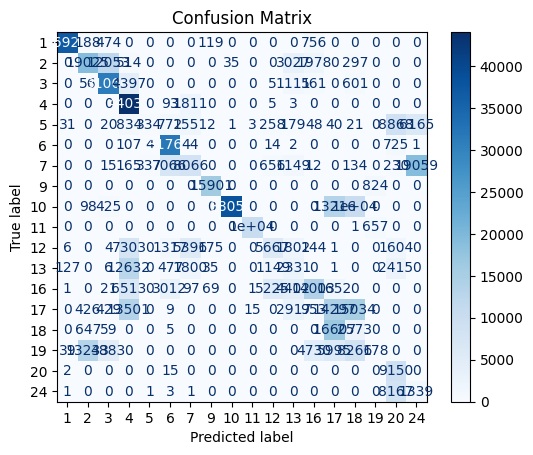

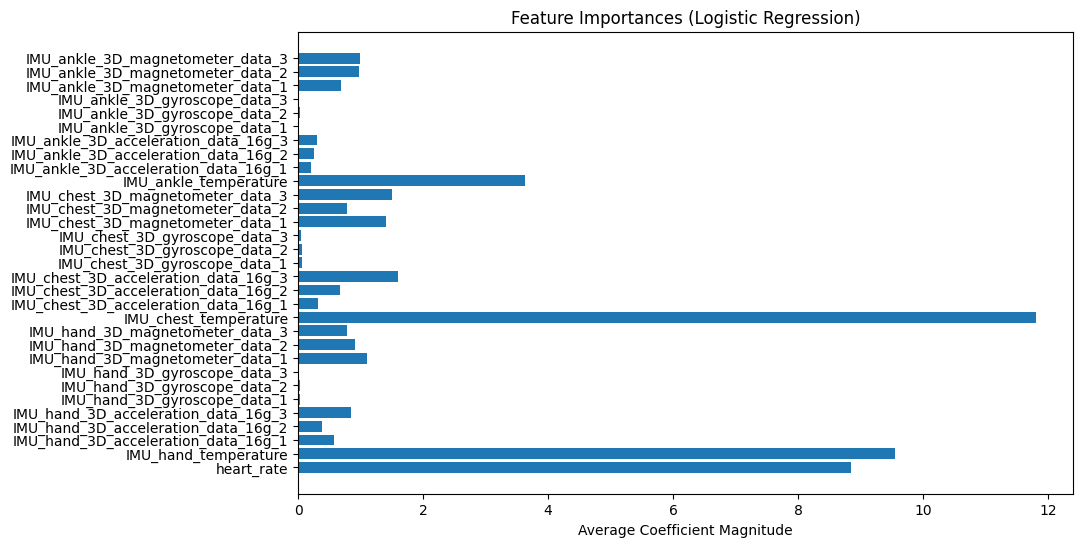

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Масштабируем признаки с помощью RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Кодируем метки, если activity_id - строковые категории
le = LabelEncoder()
le.fit(all_classes)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# Создаем и обучаем модель логистической регрессии
model = LogisticRegression(
    penalty='l2',         # Регуляризация
    C=1.0,                # Обратная сила регуляризации
    solver='lbfgs',       # Один из самых устойчивых решателей
    # multi_class='auto',   # Мультиклассовая поддержка
    max_iter=500,        # Больше итераций для сходимости
    random_state=42
)

model.fit(X_train_scaled, y_train_enc)

# Предсказание на тесте
y_pred_enc = model.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка модели
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test_enc, y_pred_enc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
plt.figure(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Визуализация важности признаков (по абсолютным значениям коэффициентов)
coefficients = np.abs(model.coef_).mean(axis=0)  # усредняем по классам
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel("Average Coefficient Magnitude")
plt.title("Feature Importances (Logistic Regression)")
plt.show()


0:	learn: 0.5057873	test: 0.4467181	best: 0.4467181 (0)	total: 4.45s	remaining: 22m 10s
100:	learn: 0.9869612	test: 0.6242942	best: 0.6244942 (99)	total: 8m	remaining: 15m 47s
200:	learn: 0.9966457	test: 0.6321413	best: 0.6427522 (141)	total: 15m 54s	remaining: 7m 50s
299:	learn: 0.9988361	test: 0.6283964	best: 0.6427522 (141)	total: 23m 45s	remaining: 0us

bestTest = 0.6427521557
bestIteration = 141

Shrink model to first 142 iterations.
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.96      0.97     38458
           2       0.97      0.89      0.93     36929
           3       0.93      0.82      0.87     37797
           4       0.73      0.94      0.82     45942
           5       0.72      0.06      0.10     19127
           6       0.63      0.80      0.71     32661
           7       0.47      0.22      0.30     36889
           9       1.00      0.94      0.97     16725
          10       0.93      0.38      0.54    

<Figure size 1500x1500 with 0 Axes>

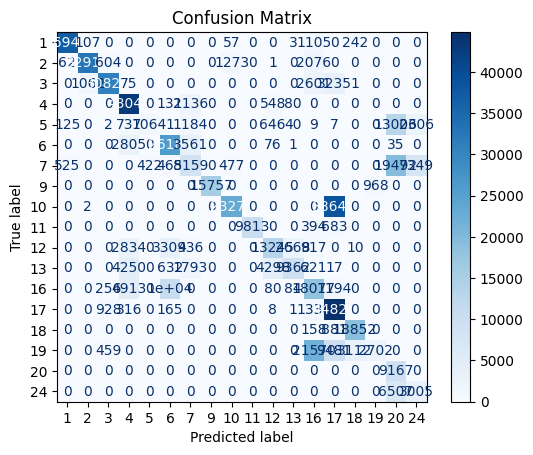

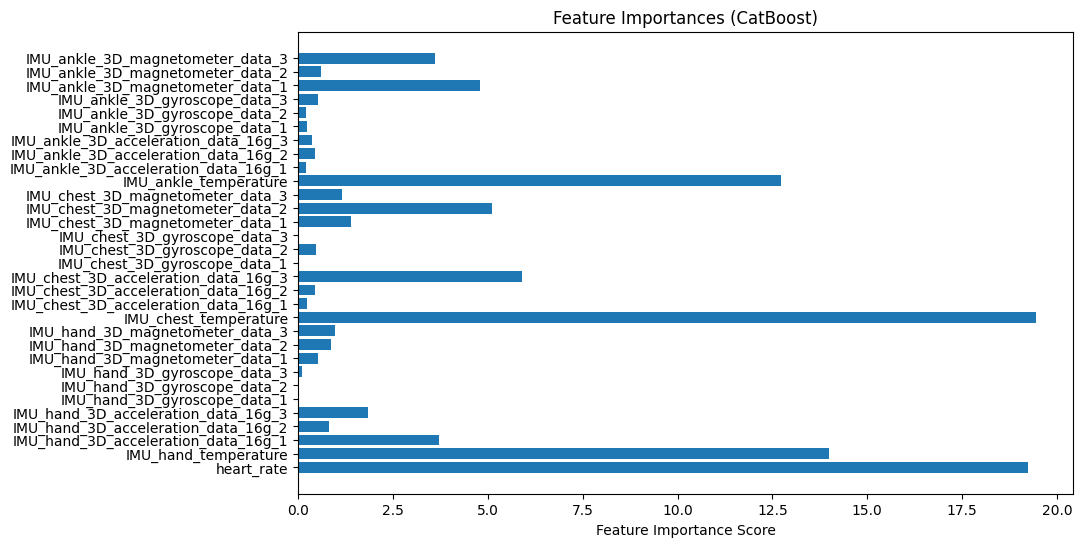

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier, Pool

# Кодируем метки
le = LabelEncoder()
le.fit(all_classes)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# Инициализация и обучение модели CatBoost
model = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    custom_metric=['F1'],
    verbose=100,
    random_seed=42
)

model.fit(X_train, y_train_enc, eval_set=(X_test, y_test_enc), use_best_model=True)

# Предсказание на тесте
y_pred_enc = model.predict(X_test).flatten().astype(int)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка модели
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test_enc, y_pred_enc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
plt.figure(figsize=(15, 15))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Визуализация важности признаков
importances = model.get_feature_importance()
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance Score")
plt.title("Feature Importances (CatBoost)")
plt.show()


In [ ]:
df_all.head()

,activity_id,heart_rate,IMU_hand_temperature,IMU_hand_3D_acceleration_data_16g_1,IMU_hand_3D_acceleration_data_16g_2,IMU_hand_3D_acceleration_data_16g_3,IMU_hand_3D_gyroscope_data_1,IMU_hand_3D_gyroscope_data_2,IMU_hand_3D_gyroscope_data_3,IMU_hand_3D_magnetometer_data_1,...,IMU_ankle_temperature,IMU_ankle_3D_acceleration_data_16g_1,IMU_ankle_3D_acceleration_data_16g_2,IMU_ankle_3D_acceleration_data_16g_3,IMU_ankle_3D_gyroscope_data_1,IMU_ankle_3D_gyroscope_data_2,IMU_ankle_3D_gyroscope_data_3,IMU_ankle_3D_magnetometer_data_1,IMU_ankle_3D_magnetometer_data_2,IMU_ankle_3D_magnetometer_data_3
2928,1,100.0,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,8.93200,...,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
2929,1,100.0,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,9.58300,...,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2930,1,100.0,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,9.05516,...,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
2931,1,100.0,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,9.92698,...,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
2932,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.15626,...,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847


In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Категориальные признаки и прочие параметры уже подготовлены
model = CatBoostClassifier(
    loss_function='MultiClass',
    eval_metric='Accuracy',
    custom_metric=['F1'],
    task_type="GPU",
    random_seed=42,
    verbose=0  # GridSearch не любит лишний вывод
)

# Сетка гиперпараметров
param_grid = {
    # Количество деревьев
    'iterations': [100, 300, 500],

    # Глубина дерева
    'depth': [4, 6, 8, 10],

    # Скорость обучения
    'learning_rate': [0.01, 0.03, 0.1, 0.2],

    # L2-регуляризация на листья
    'l2_leaf_reg': [1, 3, 5, 7, 9],

    # Минимальный размер leaf (аналог min_child_samples)
    'min_data_in_leaf': [1, 5, 10, 20],

    # Количество признаков, используемых на каждой итерации бустинга
    'rsm': [0.6, 0.8, 1.0],  # аналог feature_fraction

    # Тип grow policy (как развиваются деревья)
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],

    # Boosting type (по умолчанию 'Plain', но 'Ordered' иногда работает лучше при малом обучающем наборе)
    'boosting_type': ['Plain', 'Ordered'],

    # Использовать ли bootstrap
    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],

    # Частота сэмплирования при 'Bernoulli'
    'subsample': [0.6, 0.8, 1.0],

    # Для Bayesian bootstrap — сила регуляризации
    'bagging_temperature': [0, 1, 5, 10],

    # Регуляризация по дереву
    'random_strength': [1, 5, 10],

    # Частота оценки качества модели на валидации
    'od_wait': [20, 50, 100],  # early stopping patience

    # Функция потерь — фиксированная, но можно менять при желании
    # 'loss_function': ['MultiClass'],

    # GPU vs CPU
    'task_type': ['GPU'],
    
    # Случайность
    'random_seed': [42]
}


# Используем Accuracy как метрику
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring=make_scorer(accuracy_score),
    n_jobs=-1,
    verbose=2
)

# Запускаем подбор параметров
grid_search.fit(X_train, y_train_enc)

# Лучшая модель
best_model = grid_search.best_estimator_

print("Best parameters found:")
print(grid_search.best_params_)

# Предсказание
y_pred_enc = best_model.predict(X_test).flatten().astype(int)
y_pred = le.inverse_transform(y_pred_enc)

# Отчёт
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test_enc, y_pred_enc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
plt.figure(figsize=(15, 15))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Важность признаков
importances = best_model.get_feature_importance()
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance Score")
plt.title("Feature Importances (CatBoost)")
plt.show()
